# Single Linkage Clustering

In [1]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import math
import sys
import random

In [2]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])


### calculate distance base on Euclidean distance formula

In [3]:
def get_euclidean_distance(cluster1,cluster2):
            
    min_distance = sys.maxsize
    for  point1 in cluster1:
        for point2 in cluster2: 
            distance = math.sqrt( math.pow(point1[0] - point2[0] , 2) + math.pow(point1[1] - point2[1] , 2)) 
            if(distance < min_distance):
                min_distance = distance
    return min_distance

### hierarchical clustering with single linkage

In [4]:
def cal_single_linkage( X , iteration):
    h_clusters = { index: [list(np.round(val,3))] for index, val in enumerate(X)}

    for i in range(iteration):   

        #calculate distance of each data point to other data points where i!=j
        hc_distance = {(i,j): get_euclidean_distance(val1, val2)
                   for i,val1 in h_clusters.items() 
                   for j,val2 in h_clusters.items() 
                   if i != j }

        hc_distance = sorted(hc_distance.items() , key = lambda k: k[1])

        # arbitrarily set new cluster id
        merged_cluster_index = min(hc_distance[0][0])

        for index in hc_distance[0][0]:
            if index != merged_cluster_index:
                for item in h_clusters[index]:     
                    h_clusters[merged_cluster_index].append(item)
                del h_clusters[index]

        if len(h_clusters) == 1:
            print("Break in iteration ", i+1)
            break
        
    for key, val in h_clusters.items():
        if len(val) > 1:
            print(key, val)

In [5]:
cal_single_linkage(X, 1)

1 [[10, 15], [15, 12]]


In [6]:
cal_single_linkage(X, 5)

0 [[5, 3], [10, 15], [15, 12], [24, 10]]
6 [[71, 80], [60, 78], [80, 91]]


In [7]:
cal_single_linkage(X, 9)

Break in iteration  9
0 [[5, 3], [10, 15], [15, 12], [24, 10], [30, 30], [85, 70], [71, 80], [60, 78], [80, 91], [70, 55]]


### compare Result of scartch code with library

In [8]:
from sklearn.metrics.pairwise import pairwise_distances
initial_distances = pairwise_distances(X,metric='euclidean')

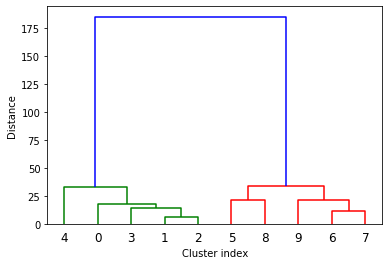

In [9]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
link_c = linkage(X, method='ward')
#print(link_c)

plt.figure()
dendrogram(link_c)
plt.xlabel('Cluster index')# (suppressed)')
plt.ylabel('Distance')
plt.show()